<a href="https://colab.research.google.com/github/neillinehan/NeilLinehanPortfolio/blob/main/phy_lab_motion_in_fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constant Electric \& Magnetic fields

In both the Parallel-Plate-Capacitor and the Helmholtz-Coil

Then we would consider the motion of an electron within these situations

## Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib.animation as animation
from IPython.display import HTML

π = np.pi

# Constant Vector Fields

## Derive a Constant 3D Vector Field (all vectors being idenitical)

In [ ]:
x      = np.arange(-10,10,0.2)
XYZ    = np.asarray(np.meshgrid(x,x,x))

v_x    = np.array([1.123123,8.12653712,123.4123]) ### vector to clone
v_xXYZ = np.ones((3,len(x),len(x),len(x)))

v_xXYZ = (v_xXYZ * v_x[:,None,None,None]) ### cloned vectors


v_xXYZ[:,12,12,15]

array([  1.123123  ,   8.12653712, 123.4123    ])

#

## Determine the Interpolation of this Vector Field (2D)

0.16682969936570477 1.0


<Figure size 432x288 with 0 Axes>

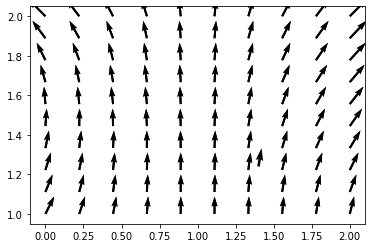

In [ ]:
plt.figure(1)
#plt.quiver(x, y, u, v)

xx = np.linspace(0, 2, 10)
yy = np.linspace(1, 2, 10)
xx, yy = np.meshgrid(xx, yy) ### fine mesh
xxyy = np.asarray( np.meshgrid(xx, yy) )

#points = np.transpose(np.vstack((x, y)))
u_interp = interpolate.griddata(points, u, (xx, yy), method='cubic')
#v_interp = interpolate.griddata(points, v, (xx, yy), method='cubic')

### interpolate one point (1.4, 1.24)
uu = interpolate.griddata(points, u, (1.4, 1.24), method='cubic')
#vv = interpolate.griddata(points, v, (1.4, 1.24), method='cubic')
print(uu, vv)

plt.figure(2)
plt.quiver(xx, yy, u_interp, v_interp)
plt.quiver(xx, yy, u_interp, v_interp)
plt.quiver(1.4, 1.24, uu, vv)
plt.show()

0.16682969936570477 1.0


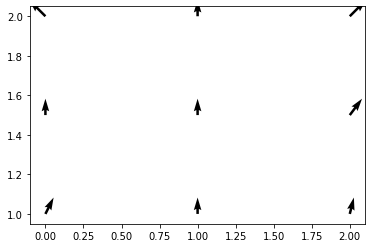

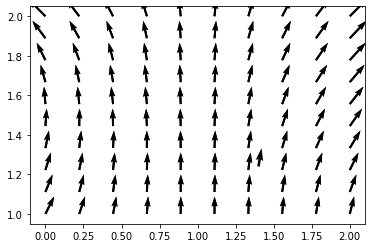

In [ ]:
x = [0, 0, 1, 1, 2, 2, 0, 1, 2]
y = [1, 2, 1, 2, 1, 2, 1.5, 1.5, 1.5]
u = [0.5, -1, 0, 0, 0.25, 1, 0, 0, 0.75]
v = [1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.figure(1)
plt.quiver(x, y, u, v)

xx = np.linspace(0, 2, 10)
yy = np.linspace(1, 2, 10)
xx, yy = np.meshgrid(xx, yy) ### fine mesh
xxyy = np.asarray( np.meshgrid(xx, yy) )

points = np.transpose(np.vstack((x, y)))
u_interp = interpolate.griddata(points, u, (xx, yy), method='cubic')
v_interp = interpolate.griddata(points, v, (xx, yy), method='cubic')

### interpolate one point (1.4, 1.24)
uu = interpolate.griddata(points, u, (1.4, 1.24), method='cubic')
vv = interpolate.griddata(points, v, (1.4, 1.24), method='cubic')
print(uu, vv)

plt.figure(2)
plt.quiver(xx, yy, u_interp, v_interp)
plt.quiver(xx, yy, u_interp, v_interp)
plt.quiver(1.4, 1.24, uu, vv)
plt.show()

In [ ]:
(xx, yy)
xxyy.shape

(2, 100, 100)

## Velocity Verlet Electron Integrator

$v, q,$ and $m$, is the particle's velocity, charge, and mass respectively:

\begin{align*}
f_x &= q\mathcal{E}_x + q \left(v\times \mathcal{B}\right)_x \\
a_x &= \frac{q}{m}\,\left( \mathcal{E}_x + \left(v\times \mathcal{B}\right)_x \right)
\end{align*}

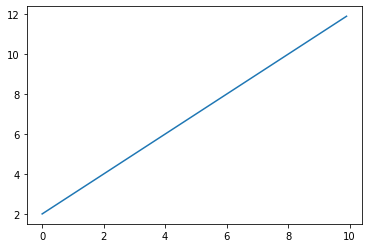

In [ ]:
Δt = 0.1  ### s (detector resolution)
tf = 10   ### s (detector)

timeline = np.arange(0, tf, Δt)

R = np.zeros((len(timeline),3))
m = 1  ## a.u. (in units of electron masses)

x = np.array([2., 0., 0.]) ## Bohr Radius
v = np.array([1., 0., 0.]) ## Bohr Radius / a.u. time
a = np.zeros(3) / m  ## Bohr Radius / a.u. time / a.u. time

for t in range(len(timeline)):
    R[t] = x
    x   += v * Δt + a * Δt*Δt/2
    A    = np.zeros(3) / m ###
    v   += ( a + A ) * Δt / 2
    a    = A





plt.plot(timeline, R[:,0])
plt.show()

# Constant Electric Field (Parallel-Plate-Capacitor)

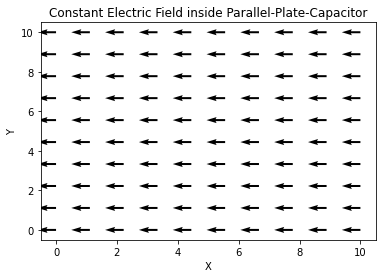

In [ ]:
N = 10
max = 10
x      = np.linspace(0,max,N)
XY   = np.asarray(np.meshgrid(x,x))

E_field    = np.array([-.001,0]) ### vector to clone
E_fieldXY = np.ones((2,len(x),len(x)))

E_fieldXY = (E_fieldXY * E_field[:,None,None]) ### cloned vectors
plt.quiver(XY[0],XY[1],E_fieldXY[0],E_fieldXY[1]);
plt.title('Constant Electric Field inside Parallel-Plate-Capacitor');
plt.xlabel('X');
plt.ylabel('Y');

# Constant Magnetic Field (Helmholtz-Coil)

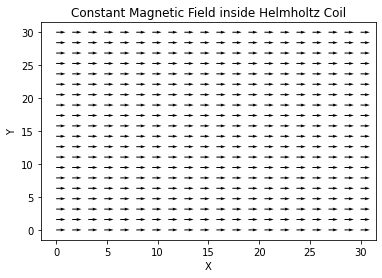

In [ ]:
N = 20
x      = np.linspace(0,30,N)
XY   = np.asarray(np.meshgrid(x,x))

B_field    = np.array([1,0]) ### vector to clone
B_fieldXY = np.ones((2,len(x),len(x)))

B_fieldXY = (B_fieldXY * B_field[:,None,None]) ### cloned vectors
plt.quiver(XY[0],XY[1],B_fieldXY[0],B_fieldXY[1]);
plt.title('Constant Magnetic Field inside Helmholtz Coil');
plt.xlabel('X');
plt.ylabel('Y');

# Electron Motion in constant Electric Fields

In [ ]:
N = 10
max = 10
x      = np.linspace(0,max,N)
XY   = np.asarray(np.meshgrid(x,x))

E_field    = np.array([-.001,0]) ### vector to clone
E_fieldXY = np.ones((2,len(x),len(x)))

E_fieldXY = (E_fieldXY * E_field[:,None,None]) ### cloned vectors


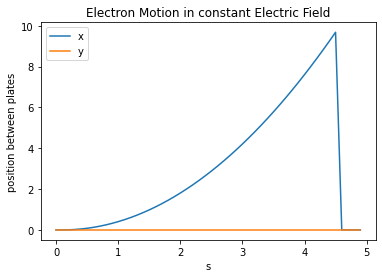

In [ ]:

N = 10
max = 10
x      = np.linspace(0,max,N)
XY   = np.asarray(np.meshgrid(x,x))

Δt = 0.1  ### s (detector resolution)
tf = 5  ### s (detector)
timeline = np.arange(0, tf, Δt)
E_field    = np.array([-.01,0]) ### vector to clone
R = np.zeros((len(timeline),2))
m = 1  ## a.u. (in units of electron masses)
x0 = np.array([0., 0.]) ## Bohr Radius
v0 = np.array([0,0]) ## Bohr Radius / a.u. time
x = x0

for t in range(len(timeline)):
  R[t] = x
  x   = v0 * t + -E_field * t*t/2 + x0
  if np.any(x > max): break


fig, ax = plt.subplots()
ax.plot(timeline,R[:,:])
plt.xlabel('s');
plt.legend(('x','y','z'))
plt.ylabel('position between plates');
plt.title('Electron Motion in constant Electric Field')
plt.show();


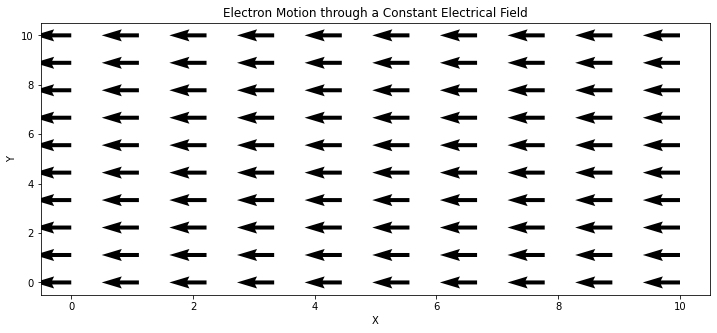

In [ ]:
#initialize animation
# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax2 = plt.subplot()

ax2.quiver(XY[0],XY[1],E_fieldXY[0],E_fieldXY[1]);
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Electron Motion through a Constant Electrical Field')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
pt1, = ax2.plot([], [], 'g.', ms=20,animated=True)
line1, = ax2.plot([], [], 'y', lw=2,animated=True)


In [ ]:
# animation function. This is called sequentially
def drawframe(n):
  pt1.set_data(R[n,0],R[n,1])
  return (line1,line1)

In [ ]:
anim = animation.FuncAnimation(fig, drawframe, frames=len(timeline), interval=30, blit=True, );

In [ ]:
HTML(anim.to_html5_video()) #should take around 20s

# Electron Motion in constant Magnetic Fields

In [ ]:
N = 20
x      = np.linspace(0,26,N)
XYZ   = np.asarray(np.meshgrid(x,x,x))

B_field    = np.array([0,0,-1]) ### vector to clone
B_fieldXY = np.ones((3,len(x),len(x),len(x)))

B_fieldXY = (B_fieldXY * B_field[:,None,None,None]) ### cloned vectors

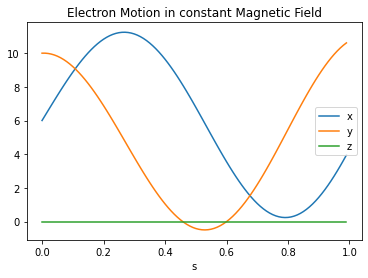

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#def motion_EField(v,x,E):
Δt = .01  ### s (detector resolution)
tf = 1  ### s (detector)
timeline = np.arange(0, tf, Δt)
B_field    = np.array([0,0,-6]) ### vector to clone
R = np.zeros((len(timeline),3))

m = 1  ## a.u. (in units of electron masses)
x0 = np.array([6., 10.,0]) ## Bohr Radius
v0 = np.array([30,0,0]) ## Bohr Radius / a.u. time
v = np.linalg.norm(v0) * (a * Δt + v0)/np.linalg.norm(a* Δt+v0) #new velocity vector, in the direction of acceleration plus velocity, equal in magnitude to veclocity vector.
for t in range(len(timeline)):
  R[t] = x0 #first position of electron saved.
  x0   = v0 * Δt + x0 #poisition of electron at t seconds, electron will move in direction of diplacement vector. d*(delta)t gives distance moved in that amount of time. plus previous poisition.
  a = np.cross(-v0,B_field) #re-calculate the new acceleration vector.
  v0 = a*Δt + v0
  #v0 = np.linalg.norm(v) * (a*Δt + v0)/np.linalg.norm(a*Δt+v0) #a = (qv x B)/m, m=1, q = -1, Since B_field is into the page, a is perpendicular to v0




fig, ax = plt.subplots()
ax.plot(timeline,R[:,:])
plt.xlabel('s');
plt.ylabel('');
plt.legend(('x','y','z'))
plt.title('Electron Motion in constant Magnetic Field')
plt.show();

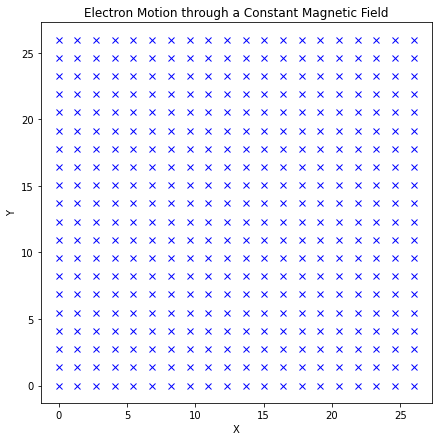

In [ ]:
#initialize animation
# create a figure and axes
fig = plt.figure(figsize=(7,7))
ax2 = plt.subplot()

for i in range(N):
 ax2.plot(XYZ[0,i,:,0],XYZ[1,i,:,0],'bx')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Electron Motion through a Constant Magnetic Field')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
pt1, = ax2.plot([], [], 'g.', ms=20,animated=True)
line1, = ax2.plot([], [], 'y', lw=2,animated=True)


In [ ]:
# animation function. This is called sequentially
def drawframe(n):
  pt1.set_data(R[n,0],R[n,1])
  return (line1,line1)

In [ ]:
anim = animation.FuncAnimation(fig, drawframe, frames=len(timeline), interval=30, blit=True, );

In [ ]:
HTML(anim.to_html5_video()) #should take around 20s

## Movement of an electron through a capacitor into a mag field.


In [ ]:
N = 10
max = 100 # length of capacitor
r      = np.linspace(0,200,N)
XYZ   = np.asarray(np.meshgrid(r,r,r))

In [ ]:
Δt = 0.01  ### s (detector resolution)
tf = .4  ### s (detector)
timeline = np.arange(0, tf, Δt)
R = np.zeros((len(timeline),3))

In [ ]:
E_field    = np.array([-1,0,0]) ### vector to clone
B_field    = np.array([0,0,-100]) ### vector to clone
m = 1  ## a.u. (in units of electron masses)
q = -1

In [ ]:

x0 = np.array([0., 50.,0]) ## Bohr Radius
x = x0
v0 = np.array([0,0,0]) ## Bohr Radius / a.u. time
for t in range(len(timeline)):
  if x[0] >= max:
    R[t] = x #first position of electron saved.
    x   = v * Δt + x #poisition of electron at t seconds, electron will move in direction of diplacement vector. d*(delta)t gives distance moved in that amount of time. plus previous poisition.
    a = np.cross(-v,B_field) #re-calculate the new acceleration vector.
    v = a*Δt + v
    if x[0] < max:
      break
  elif x[0] < max:
    R[t] = x
    x   = v0 * t + -E_field * t*t/2 + x0
    v = -E_field * t

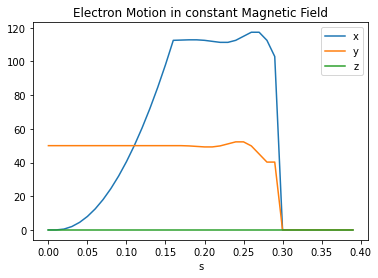

In [ ]:
fig, ax = plt.subplots()
ax.plot(timeline,R[:,:])
plt.xlabel('s');
plt.ylabel('');
plt.legend(('x','y','z'))
plt.title('Electron Motion in constant Magnetic Field')
plt.show();

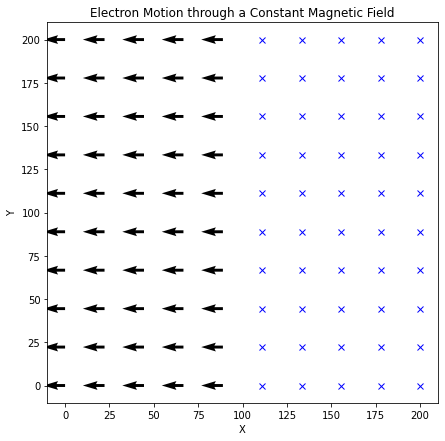

In [ ]:
#initialize animation
# create a figure and axes
fig = plt.figure(figsize=(7,7))
ax2 = plt.subplot()

E_fieldXY = np.ones(( 3,len(r),len(r), len(r) ) )
E_fieldXY = (E_fieldXY * E_field[:,None,None,None]) ### cloned vectors

ax2.quiver(XYZ[0,:,0:5,0],XYZ[1,:,0:5,0],E_fieldXY[0,:,0:5,0],E_fieldXY[1,:,0:5,0]);
for i in range(N):
 ax2.plot(XYZ[0,i,5:,0],XYZ[1,i,5:,0],'bx')





ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Electron Motion through a Constant Magnetic Field')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
pt1, = ax2.plot([], [], 'g.', ms=20,animated=True)
line1, = ax2.plot([], [], 'y', lw=2,animated=True)




In [ ]:
# animation function. This is called sequentially
def drawframe(n):
  pt1.set_data(R[n,0],R[n,1])
  return (line1,line1)

In [ ]:
anim = animation.FuncAnimation(fig, drawframe, frames=len(timeline), interval=39, blit=True, );

In [ ]:
HTML(anim.to_html5_video()) #should take around 20s